In [7]:
# does everybody really die in the summer?

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# let's load the data from the /data folder
data = pd.read_csv('data/boston_shots_fired.csv')
data.head()

# the district column represents the different police districts in Boston
# maps of the districts are easily available online

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
4,I152000872-00,2015-01-04 00:13:00+00,B2,f


In [3]:
data.dtypes

incident_num           object
incident_date          object
district               object
ballistics_evidence    object
dtype: object

In [4]:
# let's convert the date column to a datetime object
data['incident_date'] = pd.to_datetime(data['incident_date'])
data.dtypes

incident_num                        object
incident_date          datetime64[ns, UTC]
district                            object
ballistics_evidence                 object
dtype: object

In [5]:
# let's convert the ballistics column to a boolean where t means True and f means False
data['ballistics_evidence'] = data['ballistics_evidence'] == 't'
data.head()

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00:00,C11,False
1,I152000042-00,2015-01-01 00:05:00+00:00,A15,False
2,I152000514-00,2015-01-02 15:51:00+00:00,B3,True
3,I152000965-00,2015-01-04 15:30:00+00:00,B2,True
4,I152000872-00,2015-01-04 00:13:00+00:00,B2,False


In [25]:
data['ballistics_evidence'].value_counts()

ballistics_evidence
False    5317
True     2751
Name: count, dtype: int64

<Axes: xlabel='incident_date'>

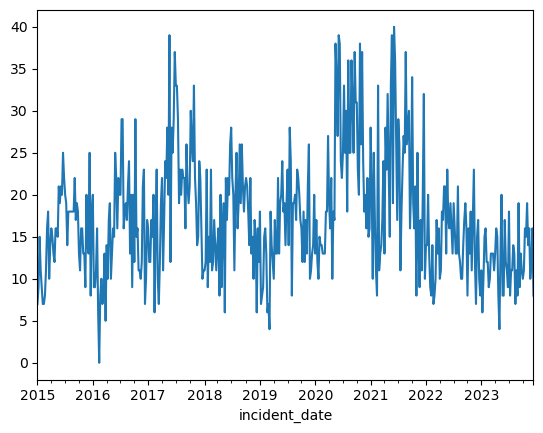

In [18]:
weekly = data.groupby(pd.Grouper(key='incident_date', freq='W')).count()
daily = data.groupby(pd.Grouper(key='incident_date', freq='D')).count()
quarterly = data.groupby(pd.Grouper(key='incident_date', freq='Q')).count()
weekly['incident_num'].plot()

<Axes: xlabel='incident_date'>

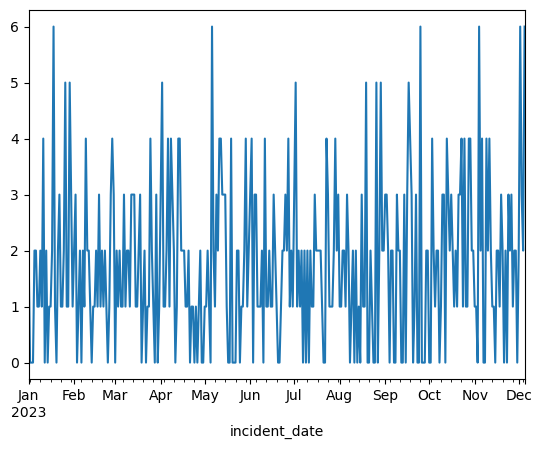

In [17]:
# let's look at the daily data for 2023 only

daily['incident_num']['2023'].plot()

<Axes: xlabel='incident_date'>

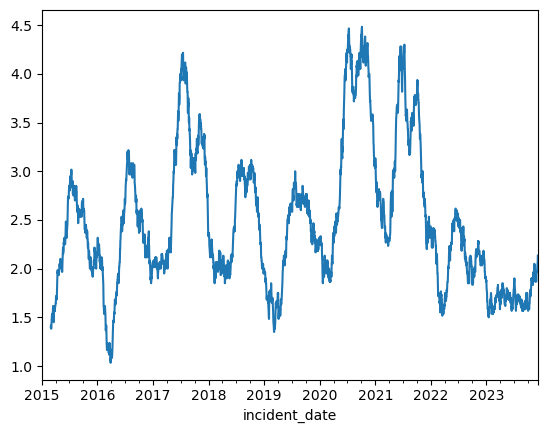

In [23]:
# let's get a 60 day moving average of the daily data for all years

daily['incident_num'].rolling(60).mean().plot()


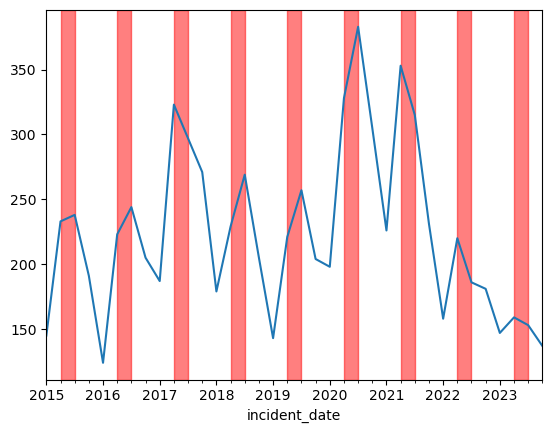

In [24]:
# finally let's look at the quarterly data and highlight the summer months in red

quarterly['incident_num'].plot()
plt.axvspan('2015-06-30', '2015-09-30', color='red', alpha=0.5)
plt.axvspan('2016-06-30', '2016-09-30', color='red', alpha=0.5)
plt.axvspan('2017-06-30', '2017-09-30', color='red', alpha=0.5)
plt.axvspan('2018-06-30', '2018-09-30', color='red', alpha=0.5)
plt.axvspan('2019-06-30', '2019-09-30', color='red', alpha=0.5)
plt.axvspan('2020-06-30', '2020-09-30', color='red', alpha=0.5)
plt.axvspan('2021-06-30', '2021-09-30', color='red', alpha=0.5)
plt.axvspan('2022-06-30', '2022-09-30', color='red', alpha=0.5)
plt.axvspan('2023-06-30', '2023-09-30', color='red', alpha=0.5)
